atmaCup11 で配布されているデータへの理解を深めるため簡単な EDA を行いましたので共有します。実行環境は Google colab です。

# EDA の前に

フォルダ構成を説明する。  
[公式](https://www.guruguru.science/competitions/17/data-sources)で配布されているデータを Google Drive に移動し "/dataset_atmaCup11/" の直下に解凍した。このフォルダ内に "/images/" フォルダを掘り photos.zip を unzip した結果を出力した。

<details>

<summary>フォルダ構成ツリー</summary>

dataset_atmaCup11  
&nbsp;&nbsp;&nbsp;&nbsp;|- atmaCup#11_sample_submission.csv'  
&nbsp;&nbsp;&nbsp;&nbsp;|- test.csv  
&nbsp;&nbsp;&nbsp;&nbsp;|- techniques.csv  
&nbsp;&nbsp;&nbsp;&nbsp;|- train.csv  
&nbsp;&nbsp;&nbsp;&nbsp;|- materials.csv  
&nbsp;&nbsp;&nbsp;&nbsp;|- images  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|- `<object_id>`.jpg  

</details>

In [ ]:
#@title
import glob
import os

In [ ]:
class Folder:
    '''データをどのフォルダに格納したのか
 
    '''
    ROOT: str = '/content/drive/MyDrive/Colab Notebooks/atmacup11'  # ワーキングディレクトリ
    CSV: str = os.path.join(ROOT, 'dataset_atmaCup11')  # コンペティションデータはここにある
    IMAGES: str = os.path.join(CSV, 'images')  # unzip した画像ファイルはここにある 

# カレントディレクトリを変更する
os.chdir(Folder.ROOT)

In [ ]:
csv_files = glob.glob(os.path.join(Folder.CSV, '*.csv'))
csv_files

['/content/drive/MyDrive/Colab Notebooks/atmacup11/dataset_atmaCup11/atmaCup#11_sample_submission.csv',
 '/content/drive/MyDrive/Colab Notebooks/atmacup11/dataset_atmaCup11/test.csv',
 '/content/drive/MyDrive/Colab Notebooks/atmacup11/dataset_atmaCup11/techniques.csv',
 '/content/drive/MyDrive/Colab Notebooks/atmacup11/dataset_atmaCup11/train.csv',
 '/content/drive/MyDrive/Colab Notebooks/atmacup11/dataset_atmaCup11/materials.csv']

In [ ]:
jpg_files = glob.glob(os.path.join(Folder.IMAGES, '*.jpg'))
print(f'jpg ファイルは {len(jpg_files)} 個')
jpg_files[:10]  # ファイル数が半端ではないので表示するのはごく一部

jpg ファイルは 9856 個


['/content/drive/MyDrive/Colab Notebooks/atmacup11/dataset_atmaCup11/images/7b36b0fd382a84d07619.jpg',
 '/content/drive/MyDrive/Colab Notebooks/atmacup11/dataset_atmaCup11/images/aa2e58050f2a812ee66c.jpg',
 '/content/drive/MyDrive/Colab Notebooks/atmacup11/dataset_atmaCup11/images/cab69532df3ce6ebadf0.jpg',
 '/content/drive/MyDrive/Colab Notebooks/atmacup11/dataset_atmaCup11/images/6d6b29b4bed7b579f1b8.jpg',
 '/content/drive/MyDrive/Colab Notebooks/atmacup11/dataset_atmaCup11/images/ddf5ce869fdadd1022e1.jpg',
 '/content/drive/MyDrive/Colab Notebooks/atmacup11/dataset_atmaCup11/images/7fcc022a529ffecdf5db.jpg',
 '/content/drive/MyDrive/Colab Notebooks/atmacup11/dataset_atmaCup11/images/ccd552ee146ff2b2b408.jpg',
 '/content/drive/MyDrive/Colab Notebooks/atmacup11/dataset_atmaCup11/images/09123efb724d702e165c.jpg',
 '/content/drive/MyDrive/Colab Notebooks/atmacup11/dataset_atmaCup11/images/356221abe6b4bb6b3acd.jpg',
 '/content/drive/MyDrive/Colab Notebooks/atmacup11/dataset_atmaCup11/imag

# EDA


以下の観点で EDA を行う。

- 全ての画像データのサイズ、チャネル数を確認する
- 教師データの分布を確認する
- `art-series-id` を確認する
- techniques.csv の分布を確認し教師データとの相関を確認する
- materials.csv の分布を確認し教師データとの相関を確認する
- test.csv のボリュームを確認する

## 全ての画像データのサイズ、チャネル数を確認する

In [ ]:
#@title
from typing import List, Optional

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
from tqdm import tqdm

pd.options.display.float_format = '{:.2f}'.format

In [ ]:
#@title
def get_size_channel(jpg_file: str) -> List[int]:
    '''画像の高さ、幅、チャネル数を取得する。

    Parameters
    ----------
    jpg_file: str
        画像のファイルパス。

    Returns
    -------
    size_channel_info: List[int], length = 3
        [高さ, 幅, チャネル数]
    '''
    img = plt.imread(jpg_file)
    return [
        img.shape[0],  # 高さ
        img.shape[1],  # 幅
        1 if img.ndim < 3 else img.shape[2]  # チャネル数
    ]

In [ ]:
#@title
# 全ての画像ファイルの高さ、幅、チャネル数を取得する（数分かかる）
size_channel_info = []
for jpg_file in tqdm(jpg_files):
    img = plt.imread(jpg_file)
    # グレースケールではないこと
    assert(img.ndim == 3)
    size_channel_info.append([img.shape[0],  # 高さ
                              img.shape[1],  # 幅
                              img.shape[2]   # チャネル数
                              ])

100%|██████████| 9856/9856 [06:20<00:00, 25.88it/s]


In [ ]:
#@title
# データフレーム化して集計する
df_size_channel = pd.DataFrame(data=size_channel_info,
                               columns=['height', 'width', 'num_channels'])
df_size_channel['filename'] = jpg_files
df_size_channel.describe()

,height,width,num_channels
count,9856.000000,9856.000000,9856.0
mean,191.405438,194.124290,3.0
std,37.690367,33.473324,0.0
min,35.000000,72.000000,3.0
25%,158.000000,165.000000,3.0
50%,224.000000,213.000000,3.0
75%,224.000000,224.000000,3.0
max,224.000000,224.000000,3.0


チャネル数はどの画像も3。高さと幅はだいたいの画像は224だがもっと小さい画像もありそう。

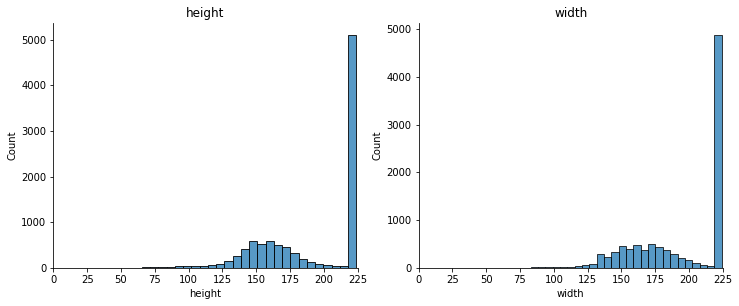

In [ ]:
#@title
figure = plt.figure(figsize=(12, 4.5))
for i, column in enumerate(['height', 'width']):
    ax = plt.subplot(1, 2, i + 1)
    ax.set_title(column)
    ax.set_xlim(0, 225)
    sns.histplot(data=df_size_channel, x=column)
    sns.despine()

## 教師データの分布を確認する

train.csv を確認する。

In [ ]:
%%time
train = pd.read_csv(os.path.join(Folder.CSV, 'train.csv'))

CPU times: user 8.87 ms, sys: 845 µs, total: 9.71 ms
Wall time: 12.6 ms


In [ ]:
train

,object_id,sorting_date,art_series_id,target
0,002bff09b09998d0be65,1631,509357f67692a6a45626,1
1,00309fb1ef05416f9c1f,1900,7987b47bbe5dc3039179,3
2,003a1562e97f79ba96dc,1834,ded7c3c9636708e5b14c,3
3,004890880e8e7431147b,1743,582ac2d7f0cef195b605,2
4,00718c32602425f504c1,1885,64c907f0c08dce4fb8e8,3
...,...,...,...,...
3932,ffa3259fff8e6f3818a1,1850,b187c294b0550acf049a,3
3933,ffd4d361756587883e48,1670,ad49a044770a48f860a6,1
3934,ffd794b7b311b7b7fd92,1789,f030a01b480b18a27be2,2
3935,ffe49bba69d06446de7e,1805,f5287bc84a05aada1d17,3


全部で3937作品。

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3937 entries, 0 to 3936
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   object_id      3937 non-null   object
 1   sorting_date   3937 non-null   int64 
 2   art_series_id  3937 non-null   object
 3   target         3937 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 123.2+ KB


欠損値は無い模様。

教師データである `target`, 加えて `target` は `sorting_date` を離散化したものなので `sorting_date` も分布を確認する。

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,475,1563.93,36.92,1440,1542.00,1574.00,1599.00,1600
1,896,1656.53,31.70,1601,1628.00,1655.00,1683.00,1700
2,1511,1760.01,27.40,1701,1741.00,1770.00,1782.00,1800
3,1055,1845.60,29.25,1801,1823.00,1841.00,1870.00,1991


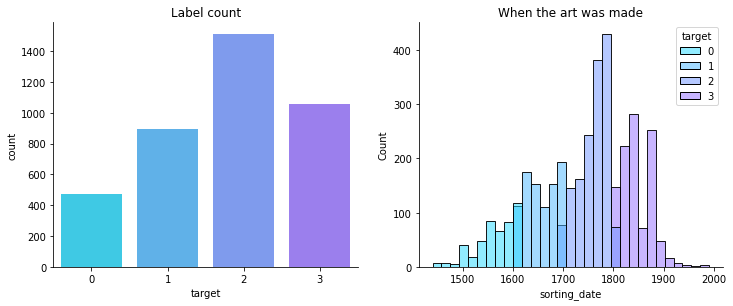

In [ ]:
#@title
# Graphs
fig = plt.figure(figsize=(12, 4.5))
plt.subplot(1, 2, 1)
ax = sns.countplot(data=train, x='target', palette=sns.color_palette('cool'))
ax.set_title('Label count')
sns.despine()
plt.subplot(1, 2, 2)
ax = sns.histplot(data=train, x='sorting_date', hue='target',
                  palette=sns.color_palette('cool')[:train['target'].nunique()])
ax.set_title('When the art was made')
sns.despine()

# Statistics
sorting_date_stat = train.groupby('target')['sorting_date'].describe().sort_index()
for column in ('count', 'min', 'max'):
    sorting_date_stat[column] = sorting_date_stat[column].astype('int')
sorting_date_stat

`sorting_date` の記述統計量を見るに作品の作成時代は1440～1991年。  
`target` の分布は一様ではなく `sorting_date` のグラフも正規分布とは言い難い。一応 `sorting_date` の分布の正規性をコルモゴロフ・スミルノフ検定にかけてみる。

In [ ]:
scipy.stats.kstest(train['sorting_date'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

P値は0.0でありやはり正規分布とは言い難い。

## `art_series_id` を確認する

シリーズ物の作品の識別子。training set にのみ存在するカラムだが test set には training set と同じシリーズの作品は無いとのこと。

In [ ]:
#@title
art_series = train.groupby('art_series_id')['sorting_date'] \
                 .describe()
for column in ('count', 'min', 'max'):
    art_series[column] = art_series[column].astype('int')    
art_series['range'] = art_series['max'] - art_series['min']  # シリーズの製作期間（開始～終了の年数）
art_series.drop(columns=['std'], inplace=True)

In [ ]:
#@title
art_series

,count,mean,min,25%,50%,75%,max,range
art_series_id,,,,,,,,
000de75d8dca452ca1ab,1,1874.00,1874,1874.00,1874.00,1874.00,1874,0
00311318c7f6fdc4b71d,1,1805.00,1805,1805.00,1805.00,1805.00,1805,0
0067672f176fe3bf9dad,2,1618.50,1618,1618.25,1618.50,1618.75,1619,1
006fe2b10fa4fe98a2a0,1,1780.00,1780,1780.00,1780.00,1780.00,1780,0
0074f20a528f2593cea8,1,1862.00,1862,1862.00,1862.00,1862.00,1862,0
...,...,...,...,...,...,...,...,...
ffb705a4314e94460d85,1,1741.00,1741,1741.00,1741.00,1741.00,1741,0
ffcec754bfaf4c89c6fa,1,1600.00,1600,1600.00,1600.00,1600.00,1600,0
ffd47c5cbd9995c365c1,1,1680.00,1680,1680.00,1680.00,1680.00,1680,0


作品数の分布を確認する。

,num_arts_in_series,num_series
0,1,3666
1,2,99
2,3,13
3,4,3
4,6,1
5,7,1
6,9,1


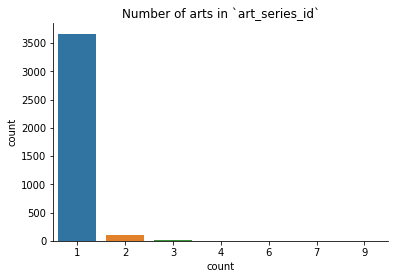

In [ ]:
#@title
ax = sns.countplot(data=art_series, x='count')
ax.set_title('Number of arts in `art_series_id`')
sns.despine()
art_series['count'].value_counts() \
                   .sort_index() \
                   .reset_index() \
                   .rename(columns={'index': 'num_arts_in_series',
                                    'count': 'num_series'})

非シリーズものが大多数を占めている。シリーズものでもせいぜい2作品。

シリーズものの製作期間 `range` が長い順にソートしてみる。

In [ ]:
#@title
art_series.sort_values('range', ascending=False)

,count,mean,min,25%,50%,75%,max,range
art_series_id,,,,,,,,
600db76c79a01bc40eb1,4,1662.50,1550,1662.50,1700.00,1700.00,1700,150
9f6b6e88a57613d73742,4,1675.25,1645,1645.00,1645.00,1675.25,1766,121
b869fd8334a3a591084e,2,1607.00,1574,1590.50,1607.00,1623.50,1640,66
eb5c485f9a37311ea34e,3,1750.67,1708,1740.00,1772.00,1772.00,1772,64
767092249ef8adf7cfc9,3,1809.33,1775,1800.00,1825.00,1826.50,1828,53
...,...,...,...,...,...,...,...,...
54677177fc3180411528,1,1679.00,1679,1679.00,1679.00,1679.00,1679,0
54809ac504d6c18f199a,1,1800.00,1800,1800.00,1800.00,1800.00,1800,0
5490ef10a09f1a04a99c,1,1791.00,1791,1791.00,1791.00,1791.00,1791,0


初作～最終作品まで100年超を経ているシリーズもあるので、必ずしも1シリーズが1人の作家のみによって製作されたとは限らなそう。

In [ ]:
#@title
def plot_image(
    object_id: str,
    image_only: bool = False,
    height: int = 5,
    width: int = 5,
    df: Optional[pd.DataFrame] = None
) -> matplotlib.figure.Figure:
    figure = plt.figure(figsize=(width, height))
    img = plt.imread(os.path.join(Folder.IMAGES, f'{object_id}.jpg'))
    ax = plt.imshow(img)
    title = f"'{object_id}'"
    if not image_only:
        df = pd.read_csv(os.path.join(Folder.CSV, 'train.csv')) if df is None else df
        df_ = df.query(f"object_id == '{object_id}'")
        sorting_date = 'Unknown(test data)' if df_.shape[0] == 0 else df_.iloc[0]['sorting_date']
        title = title + f'  sorting_date={sorting_date}'
    plt.title(title)
    sns.despine()
    return figure

In [ ]:
#@title
def plot_series(
    art_series_id: str,
    df: pd.DataFrame,
    height: int = 5,
    width: int = 5,
) -> List[matplotlib.figure.Figure]:
    '''シリーズものの作品を全部表示する。

    複数の作品がある場合 `sorting_date` > `object_id` の順に従って表示する。

    Parameters
    ----------
    art_series_id: str
        シリーズの識別子。train.csv の `art_series_id` を想定。
    df: pd.DataFrame
        `art_series_id` とそれに紐づく `object_id`, `sorting_date` がわかるもの。
    height, width: int
        各作品のグラフ上での高さ、幅。
    '''
    df_ = df[df['art_series_id'] == art_series_id]
    if df_.shape[0] < 1:
        raise ValueError(art_series_id)
    else:        
        figures = [
            plot_image(object_id, height=height, width=width, df=df_)
            for object_id in df_.sort_values(['sorting_date', 'object_id'])['object_id']
        ]
        return 

サンプルとして `art_series_id` =  "600db76c79a01bc40eb1", "0067672f176fe3bf9dad" の作品を表示する。

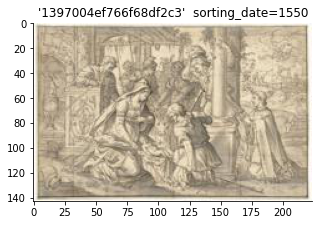

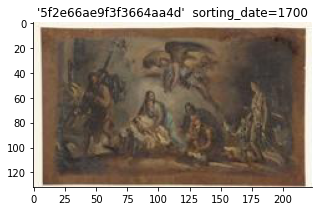

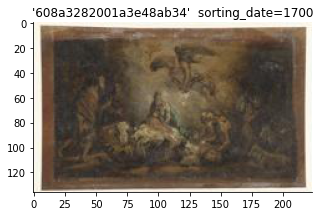

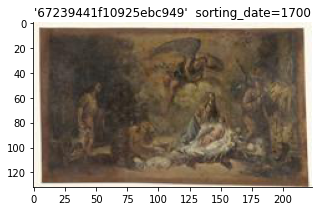

In [ ]:
plot_series('600db76c79a01bc40eb1', train)

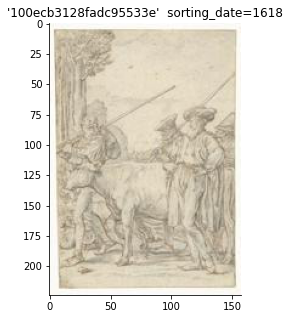

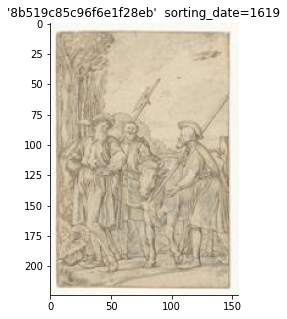

In [ ]:
plot_series('0067672f176fe3bf9dad', train)

同じ年代に書かれたシリーズ作品は内容がかなり似ている気がする。例えば機械学習モデルの開発で交差検証を行う場合、同年代に製作されたシリーズものの作品が別々の fold に入ると CV が過大評価される懸念があるかも？


## techniques.csv の分布を確認し教師データとの相関を確認する

In [ ]:
techniques = pd.read_csv(os.path.join(Folder.CSV, 'techniques.csv'))

In [ ]:
techniques

,name,object_id
0,pen,002bff09b09998d0be65
1,brush,00309fb1ef05416f9c1f
2,counterproof,004890880e8e7431147b
3,brush,007f5e3620b458d77212
4,brush,00bf812ffe8a62d45661
...,...,...
3772,brush,ffd794b7b311b7b7fd92
3773,pen,ffe49bba69d06446de7e
3774,brush,ffe49bba69d06446de7e
3775,pen,ffe77db10be3400bed53


In [ ]:
techniques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777 entries, 0 to 3776
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       3777 non-null   object
 1   object_id  3777 non-null   object
dtypes: object(2)
memory usage: 59.1+ KB


`name` の分布を確認する。

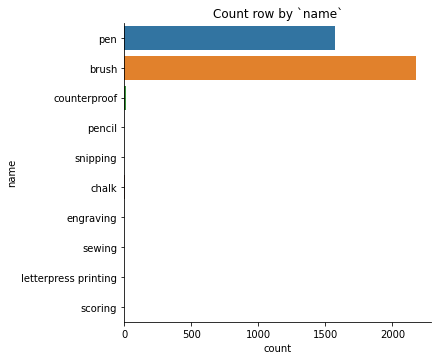

In [ ]:
#@title
figure = plt.figure(figsize=(5.5, 5.5))
ax = sns.countplot(data=techniques, y='name')
ax.set_title('Count row by `name`')
sns.despine()

全部で10の `name` が確認できる。データの大半を "pen", "brush" が占める。

train.csv とのリレーションを確認する。

In [ ]:
train[~train['object_id'].isin(techniques['object_id'])]  # train.csv にしか存在しない `object_id`

,object_id,sorting_date,art_series_id,target
2,003a1562e97f79ba96dc,1834,ded7c3c9636708e5b14c,3
4,00718c32602425f504c1,1885,64c907f0c08dce4fb8e8,3
5,007c091616828798b5e1,1839,e9440b5eb4b77f1ce0e3,3
7,00990614b43285e49f4a,1893,8134b18cdc27af23e1a8,3
9,00c93e990e799fb3d8c9,1775,2d29062fe2b09738757b,2
...,...,...,...,...
3921,fedec46674f75eeebf29,1683,d29a4318878aa4053d9b,1
3923,fefd3c7d2aaf156aa743,1857,0e70675fddb921189c3a,3
3927,ff32f8ea29ea2ec557e6,1831,374dc017e81ba976758e,3
3928,ff37540e22e1ef455368,1765,9971eebf0f583a5e51da,2


train.csv の1371作品は techniques.csv に存在しないので注意。

教師データとの相関を確認する。`name` 毎に作品でその技術が使われているかどうかを 0/1 のフラグで表現することにし、フラグと教師データの相関係数を可視化する。



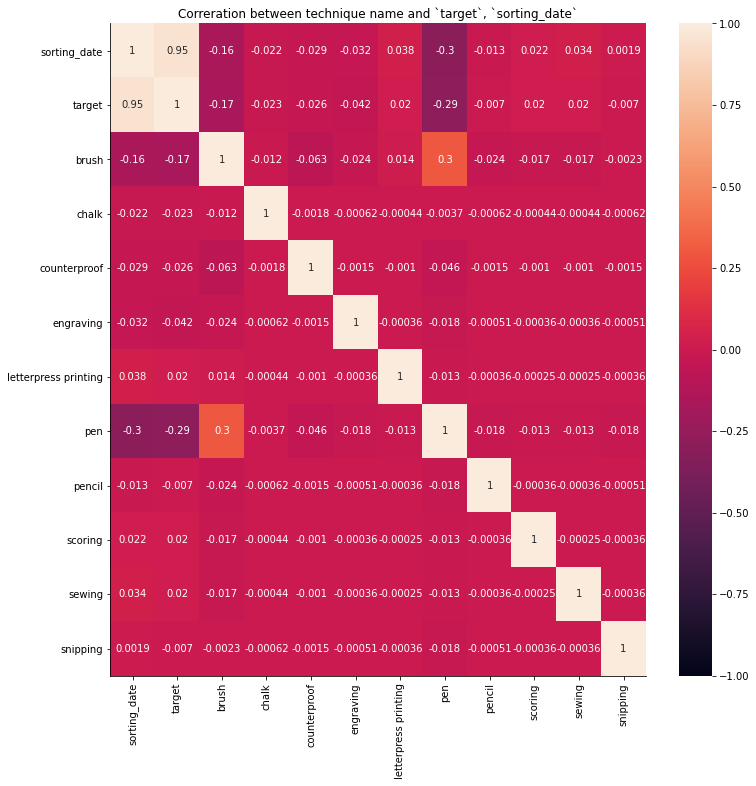

In [ ]:
#@title
tech_table = pd.crosstab(techniques['object_id'], techniques['name']).reset_index()
train_wz_tech = pd.merge(train, tech_table, how='left', on='object_id').fillna(0)
for column in tech_table.columns:
    if column == 'object_id': continue
    train_wz_tech[column] = train_wz_tech[column].astype('int')
figure = plt.figure(figsize=(12, 12))
ax = sns.heatmap(train_wz_tech.corr(), vmin=-1, vmax=1, annot=True)
ax.set_title('Correration between technique name and `target`, `sorting_date`')
sns.despine()

あまり強い相関は確認できない。"brush" も "pen" も比較的古い手法なのか（？） `target`, `sorting_date` との相関係数は負。

## materials.csv の分布を確認し教師データとの相関を確認する

In [ ]:
materials = pd.read_csv(os.path.join(Folder.CSV, 'materials.csv'))

In [ ]:
materials

,name,object_id
0,ink,002bff09b09998d0be65
1,paper,002bff09b09998d0be65
2,pencil,002bff09b09998d0be65
3,watercolor (paint),00309fb1ef05416f9c1f
4,paper,00309fb1ef05416f9c1f
...,...,...
9076,ink,ffe49bba69d06446de7e
9077,paper,ffe49bba69d06446de7e
9078,paper,ffe77db10be3400bed53
9079,ink,ffe77db10be3400bed53


`name` の分布を確認する。

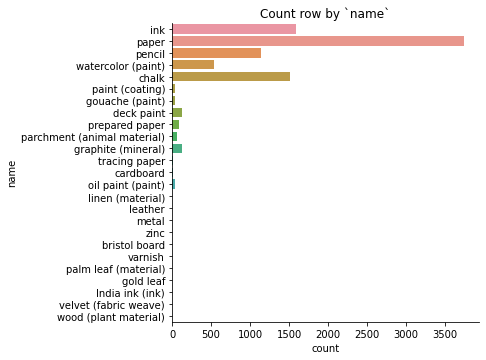

In [ ]:
#@title
figure = plt.figure(figsize=(5.5, 5.5))
ax = sns.countplot(data=materials, y='name')
ax.set_title('Count row by `name`')
sns.despine()

25の値が確認できる。多数派と少数派の件数の差が非常に大きいことがわかる。

train.csv とのリレーションを確認する。

In [ ]:
train[~train['object_id'].isin(materials['object_id'])]  # train.csv にしか存在しない `object_id`

,object_id,sorting_date,art_series_id,target
1468,60c1cacb453d497ad3a4,1700,7082ba275d243b0ab7d2,1


"60c1cacb453d497ad3a4" は material.csv には存在しないので注意。

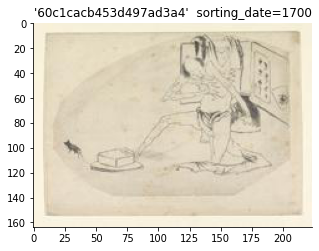

In [ ]:
plot_image("60c1cacb453d497ad3a4");

ぱっと見では何の材料が使われているかはわからない。

techniques.csv と同じ要領で教師データとの相関を確認する。

In [ ]:
#@title
material_table = pd.crosstab(materials['object_id'], materials['name']).reset_index()
train_wz_material = pd.merge(train, material_table, how='left', on='object_id').fillna(0)
for column in material_table.columns:
    if column == 'object_id': continue
    train_wz_material[column] = train_wz_material[column].astype('int')
figure = plt.figure(figsize=(21, 21))
ax = sns.heatmap(train_wz_material.corr(), vmin=-1, vmax=1, annot=True)
ax.set_title('Correration between material name and `target`, `sorting_date`')
sns.despine()

# test.csv のボリュームを確認する

In [ ]:
test = pd.read_csv(os.path.join(Folder.CSV, 'test.csv'))

In [ ]:
test

,object_id
0,0009e50b94be36ccad39
1,000bd5e82eb22f199f44
2,0015f44de1854f617516
3,00388a678879ba1efa27
4,005e1e7c6496902d23f3
...,...
5914,ffbe65ad399b632dcbd0
5915,ffd7b2d646c0320c311a
5916,ffdb93ede17d4501e530
5917,ffe111402004b0ed46b4


全部で3937作品。

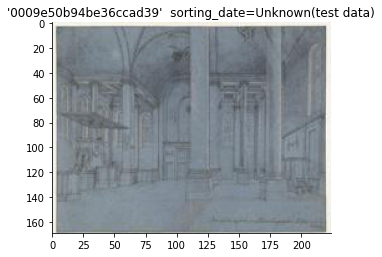

In [ ]:
plot_image("0009e50b94be36ccad39");

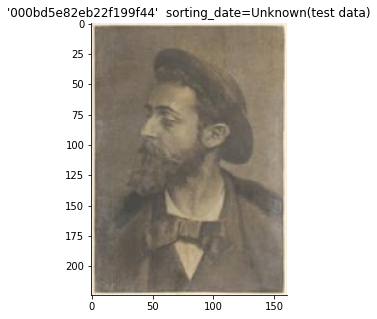

In [ ]:
plot_image("000bd5e82eb22f199f44");

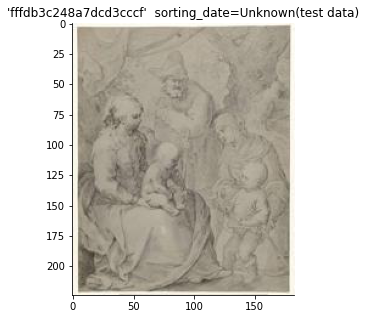

In [ ]:
plot_image("fffdb3c248a7dcd3cccf");

以上